Griffin Shelor\
2-5-2024

# In-class Exercise: Unsupervised Learning

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### We'll use the "iris" dataset for Q1 - Q4

In [2]:
# load data
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1) # features
y_iris = iris['species'] # targets


### Q1. Scale the iris dataset with `StandardScalar()`. Use this scaled dataset for Q2-Q4.

In [3]:
# Scale the data (the digits dataset doesn't really need this, but it's good practice)
Xiris_scaled = StandardScaler().fit_transform(X_iris)
print(Xiris_scaled.shape)

(150, 4)


### Q2. Fit a `PCA` model with `n_components=2` to the scaled data, and transform the data with this PCA fit. Create two new columns called `PC1` and `PC2` in your original "iris" `DataFrame` with the two transformed data values.

In [14]:
## fitting a PCA model with 2 components
pca_2comp = PCA(2)
pca_2comp.fit(Xiris_scaled)

# transform to 2 dimensions
Xiris_transform = pca_2comp.fit_transform(Xiris_scaled)

## creating 2 new columns in 
iris['PCA1'] = Xiris_transform[:,0]
iris['PCA2'] = Xiris_transform[:,1]

### Q3. Find and print the explained variances for the first two PCs (hint: this is computed automatically and stored in your `PCA` model object).

In [17]:
print(pca_2comp.explained_variance_ratio_[0])
print(pca_2comp.explained_variance_ratio_[1])

0.7296244541329986
0.22850761786701781


### Q4. Use `lmplot` to plot PC1 on the x-axis and PC2 on the y-axis, coloring the values using the iris 'species'.

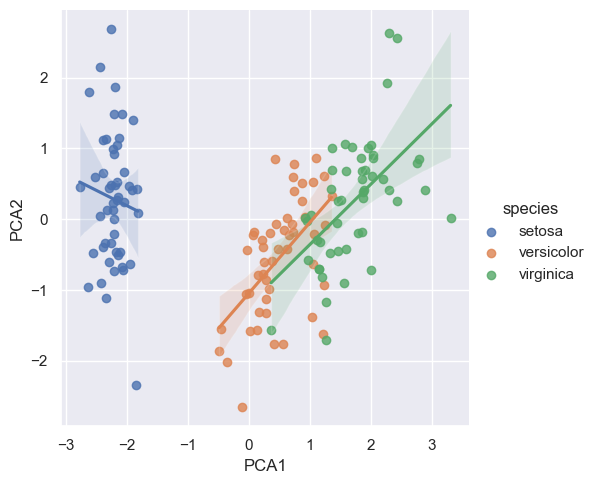

In [19]:
sns.lmplot(x = 'PCA1', y = 'PCA2', hue = 'species', data = iris);

### We'll use this dataset for Q5 - Q7.



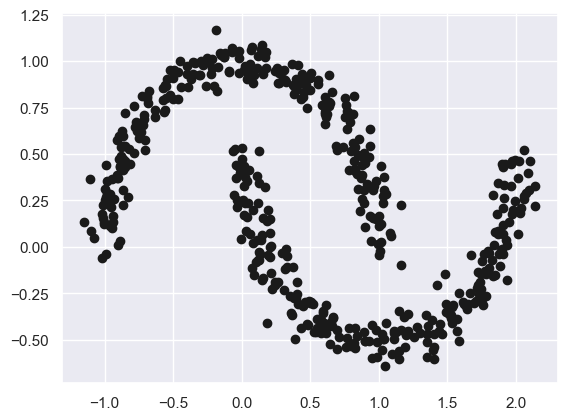

In [20]:
# Noisy Moons
X, _ = datasets.make_moons(n_samples=500, noise=.07)
plt.plot(X[:,0], X[:,1], "ko");

### Q5. Perform `KMeans` clustering with `n_clusters=2` and otherwise default parameters. Plot the data, color-coding by cluster label.

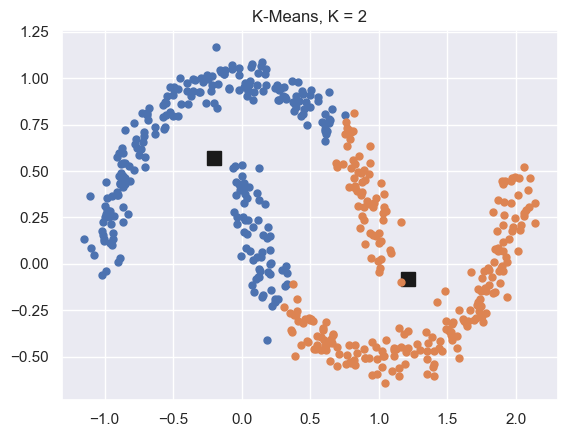

In [22]:
## Kmeans clustering with 2 clusters
k2 = KMeans(n_clusters=2).fit(X)
k2_centers = k2.cluster_centers_

# Plot updated dataset and clustering after iteration 1
labels = k2.labels_
[plt.plot(val[0], val[1], 'ks', markersize=10) for val in k2_centers]
for i in range(k2.n_clusters):
    k = labels == i
    plt.plot(X[k,0], X[k,1], 'o', markersize=5)
plt.title("K-Means, K = %d" %k2.n_clusters);

### Q6. Perform `AgglomerativeClustering` with the following parameters:
* `n_clusters=None`
* `distance_threshold=0.20`
* `linkage="single"`

### Plot the data, color-coding by cluster label.

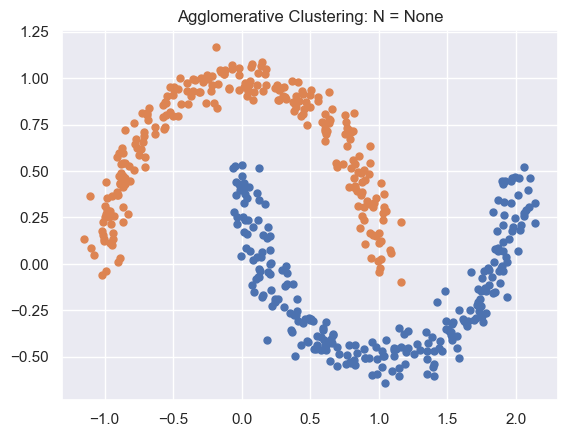

In [23]:
# Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=0.2, linkage='single').fit(X)

## plotting data
labels = ac.labels_
for i in range(ac.n_clusters_):
    k = labels == i
    plt.plot(X[k,0], X[k,1], 'o', markersize=5)
plt.title("Agglomerative Clustering: N = " + str(ac.n_clusters));

### Q7. Perform `DBSCAN` clustering with the following parameters:
* `eps=0.15`
* `min_samples=5`

### Plot the data, color-coding by cluster label.

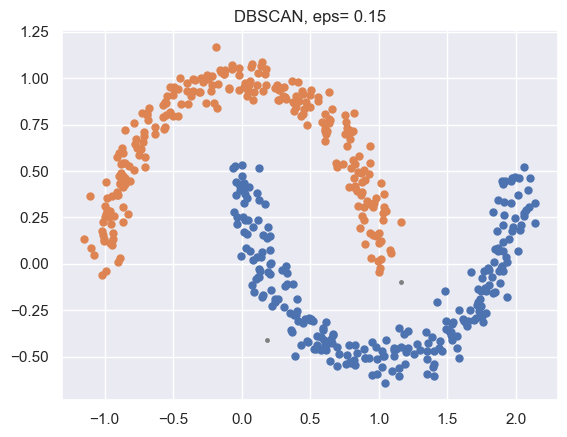

In [27]:
# Apply DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(X)

# Plot dataset and clustering
labels = db.labels_
nclust = np.max(labels)+1
for i in range(nclust):
    k = labels == i
    plt.plot(X[k,0], X[k,1], 'o', markersize=5)
    
# Plot outliers
k = labels < 0
plt.plot(X[k,0], X[k,1], '.', color="gray", markersize=5)
    
plt.title("DBSCAN, eps= %.2f" %db.eps);

### Q8. Comment on why `KMeans` performed worse than the `AgglomerativeClustering` and `DBSCAN` algorithms when applied to this dataset?

Answer: KMeans clustering performed worse than the other 2 clustering algorithms because DBSCAN is a density-based algorithm, meaning groups of points close together will be assigned to the same cluster. Agglomerative clustering also performed better because it starts by grouping points in nearby space into similar clusters, which means that points in this dataset that show up very close together when we plot them are likely to be assigned to the same cluster given their distance apart in space. KMeans, however groups points by their distance to a centroid, meaning that points that are a part of the certain dense group may be assigned a cluster away from that dense group if they are closer to the wrong centroid.



### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.